Welcome to my little Machine Learning tutorial
==============================================
In the following tutorial you will get a basic introduction into practical machine learning. 
Please make sure that you installed the following dependencies:
numpy version 1.10.4
sklearn version 0.17.1
matplotlib version 1.5.1
Note that anaconda supports all these packages. For questions please contact: markusmichael.rau@googlemail.com

The following section reads in some packages, defines some constants for plotting and reads in the data.

In [10]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
%matplotlib inline


llinewidth = 3
label_fontsize = 18
title_fontsize = 22
legend_fontsize = 14
tick_fontsize = 16
ppointsize = 8
ccapsize = 12

data = np.loadtxt('input_data.dat', skiprows=1)
#I almost always shuffle data beforehand to destroy any spurious order which 
#can be important for some machine learning algorithms
np.random.shuffle(data)

Step 1: Familiarize yourself with the data!
-------------------------------------------
It is very important to familiarize yourself with the data before you start performing machine learning procedures on it. Make a couple of plots that show the correlation between different input features, try to interpret them in terns of the photometric properties of stars and galaxies. Try out different feature combinations to see which discriminate the data better. Try to identify outlier in the data and anomalies.

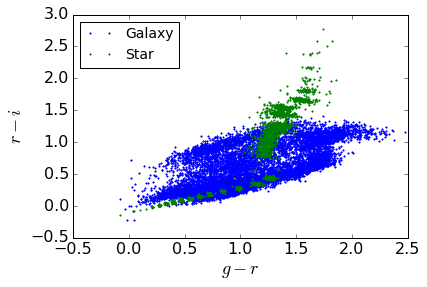

In [30]:
plt.plot(data[data[:, 1] == 1, 3] - data[data[:, 1] == 1, 5], data[data[:, 1] == 1, 5] - data[data[:, 1] == 1, 7], '.', 
        label='Galaxy', markersize=3)
plt.plot(data[data[:, 1] == 3, 3] - data[data[:, 1] == 3, 5], data[data[:, 1] == 3, 5] - data[data[:, 1] == 3, 7], '.',
        label='Star', markersize=3)
plt.xlabel(r"$g - r$", fontsize=label_fontsize)
plt.ylabel(r"$r - i$", fontsize=label_fontsize)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.legend(fontsize = legend_fontsize, loc = 'upper left')

Star-galaxy separation classification
--------------------------------------
We will now classify the objects in the dataset into either being a star or a galaxy based on their photometry alone. As noted in the introduction please make sure you hold out RANDOMLY a certain part of the data for testing. Do not touch this datajunk during any part of training. We further split up a junk of data for crossvalidation (to tune the model).

In [6]:
np.random.shuffle(data)
test = data[:4000, :]
train = data[4000:8000, :]
cv = data[8000:, :]


Now we generate an instance of the Random Forest algorithm that we want to use to separate stars from galaxies and fit it to the training data. We then make a prediction on the cv dataset and record the result.

In [8]:
#model = RandomForestClassifier(min_samples_leaf=1, n_estimators=1)

model = RandomForestClassifier()
model.fit(train[:, 3:], train[:, 1])
star_galaxy_pred_cv = model.predict(cv[:, 3:])

In [9]:
print(classification_report(cv[:, 1], star_galaxy_pred_cv, target_names=['Galaxy', 'Star']))

             precision    recall  f1-score   support

     Galaxy       0.91      0.97      0.94      6935
       Star       0.88      0.72      0.79      2359

avg / total       0.90      0.90      0.90      9294



Your task is now to play around with the model. Change the number of trees you use and the number of objects that maximally fall into the grown trees. Can you interpret them in terms of the Bias-Variance tradeoff? If your are done with everything and are fine with your model apply it to the test data to get a good estimate how well you would perform on new actual data. But don't touch it before that and don't change the model afterwards.

Photometric redshift estimation
-------------------------------
As an example for a typical regression problem, we will consider the problem of photometric redshift estimation. Photometric redshift estimation is a vital requirement for precision cosmology and currently one of the most important systematics in large imaging surveys like DES or CFHTLS. Instead of classificaiton we predict a continuous numerical variable, the distance or redshift of the object. The overall procedure of is however identical to the validation case. 

In [11]:
np.random.shuffle(data)
test = data[:4000, :]
train = data[4000:8000, :]
cv = data[8000:, :]

In [16]:
model = RandomForestRegressor()
model.fit(train[:, 3:], train[:, 2])
photoZ_pred_cv = model.predict(cv[:, 3:])

Please play around with the arguments to the RandomForestRegressor and try to see which setup gives you the best error on the cross validation data. Again try to interpret your results with respect to the bias-variance tradeoff. Use the mean squared error as a metric to tune your algorithm. If you are satisfied make predictions on the test set using your final model. This will give you an estimate of how well you would do on unknown data. Again do not tough the test data before you are finished with all tuning steps and do not refine your model after it has seen the test data. 


(0.0, 1.5)

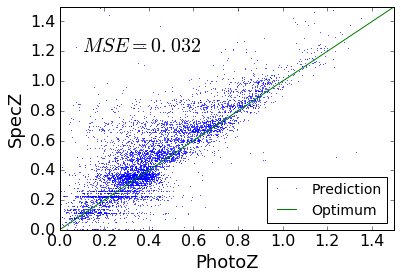

In [40]:
plt.plot(photoZ_pred_cv, cv[:, 2], '.', label='Prediction', ms=0.8)
plt.plot(np.linspace(0.0, 2.0), np.linspace(0.0, 2.0), label='Optimum')
plt.text(0.1, 1.2, r'$MSE = '+str(round(np.mean((photoZ_pred_cv - cv[:, 2])**2), 3))+'$', 
         fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.xlabel('PhotoZ', fontsize=label_fontsize)
plt.ylabel('SpecZ', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize, loc='lower right')
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.5])